In [3]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2024-07-18 14:38:38.752201: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-18 14:38:38.779893: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 14:38:38.779922: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 14:38:38.780852: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-18 14:38:38.785615: I tensorflow/core/platform/cpu_feature_guar

In [5]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

In [6]:
NUM_CLASSES = 4

In [7]:
TIME_STEPS = 16
DIMENSION = 2

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [11]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [13]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

2024-07-18 14:39:42.867867: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-18 14:39:42.895498: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-18 14:39:42.895662: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [14]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1086 (4.24 KB)
Trainable params: 1086 (4.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [16]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


2024-07-18 14:39:51.387561: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-18 14:39:51.764625: I external/local_xla/xla/service/service.cc:168] XLA service 0x560c4639ecd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-18 14:39:51.764661: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-07-18 14:39:51.770128: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-18 14:39:51.785200: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1721293791.839529   14827 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 [==============================] - ETA: 0s - loss: 1.3803 - accuracy: 0.4257
Epoch 1: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 2s 17ms/step - loss: 1.3803 - accuracy: 0.4257 - val_loss: 1.3614 - val_accuracy: 0.5627
Epoch 2/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3683 - accuracy: 0.4688
Epoch 2: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 1.3611 - accuracy: 0.4809 - val_loss: 1.3411 - val_accuracy: 0.5634
Epoch 3/1000
31/32 [============================>.] - ETA: 0s - loss: 1.3417 - accuracy: 0.4869
Epoch 3: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 1.3417 - accuracy: 0.4869 - val_loss: 1.3178 - val_accuracy: 0.5884
Epoch 4/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3134 - 

/home/deadsoul/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/32 [==========================>...] - ETA: 0s - loss: 1.3171 - accuracy: 0.5022
Epoch 4: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 1.3173 - accuracy: 0.4952 - val_loss: 1.2868 - val_accuracy: 0.5944
Epoch 5/1000
 1/32 [..............................] - ETA: 0s - loss: 1.2881 - accuracy: 0.4844
Epoch 5: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 1.2873 - accuracy: 0.5194 - val_loss: 1.2493 - val_accuracy: 0.6208
Epoch 6/1000
 1/32 [..............................] - ETA: 0s - loss: 1.2687 - accuracy: 0.5000
Epoch 6: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 1.2540 - accuracy: 0.5363 - val_loss: 1.2029 - val_accuracy: 0.6382
Epoch 7/1000
 1/32 [..............................] - ETA: 0s - loss: 1.1939 - a

In [18]:

model = tf.keras.models.load_model(model_save_path)

In [19]:

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 61ms/step
[0.9547553  0.01265134 0.01003973 0.02255372]
0


42/42 [==============================] - 0s 938us/step


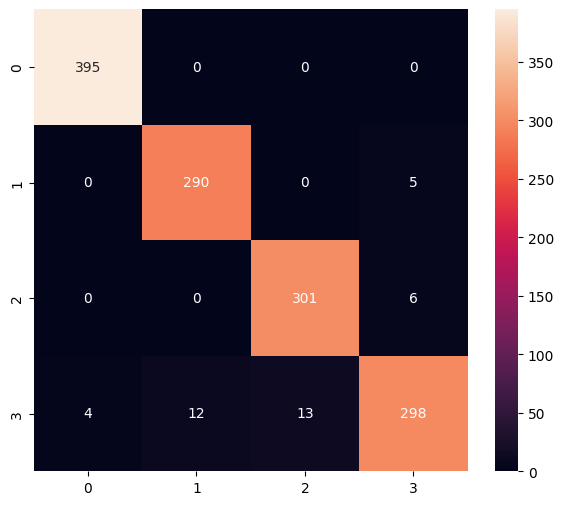

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.96      0.98      0.97       295
           2       0.96      0.98      0.97       307
           3       0.96      0.91      0.94       327

    accuracy                           0.97      1324
   macro avg       0.97      0.97      0.97      1324
weighted avg       0.97      0.97      0.97      1324



In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [21]:

model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

/home/deadsoul/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [23]:

converter = tf.lite.TFLiteConverter.from_keras_model(model) 
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpela6zxxy/assets


INFO:tensorflow:Assets written to: /tmp/tmpela6zxxy/assets
2024-07-18 14:41:25.473741: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-07-18 14:41:25.473774: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-07-18 14:41:25.474053: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpela6zxxy
2024-07-18 14:41:25.474707: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-07-18 14:41:25.474718: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpela6zxxy
2024-07-18 14:41:25.476099: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-07-18 14:41:25.476524: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-07-18 14:41:25.491040: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio

6432

In [24]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [25]:

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32], dtype=int32), 'shape_signature': array([-1, 32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [26]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [27]:
%%time

interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 0 ns, sys: 364 µs, total: 364 µs
Wall time: 303 µs


In [28]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.9547553  0.01265134 0.01003973 0.02255373]
0
